In [1]:
import numpy as np
import gym
import gym_crumb
from math import radians

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [3]:
env = gym.make("crumb-synthetic-v0")

In [4]:
from expected_value_sarsa import EVSarsaAgent
agent = EVSarsaAgent(alpha=0.1,epsilon=0.5,discount=0.99)

In [5]:
def play_and_train(env,agent,t_max=10**2):

    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getAction(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        
        agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:
            agent.epsilon = agent.epsilon * 0.8
            break
    return total_reward

mean reward 984.0


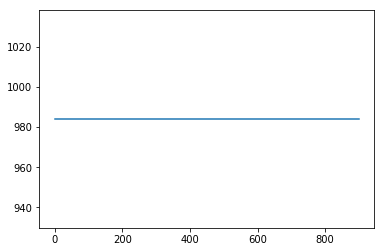

6.29325874852134e-183
5.034606998817073e-183
4.027685599053659e-183
3.222148479242927e-183
2.577718783394342e-183
2.0621750267154736e-183
1.6497400213723789e-183
1.3197920170979032e-183
1.0558336136783226e-183
8.446668909426582e-184
6.757335127541266e-184
5.405868102033012e-184
4.32469448162641e-184
3.4597555853011285e-184
2.767804468240903e-184
2.2142435745927225e-184
1.7713948596741782e-184
1.4171158877393426e-184
1.1336927101914741e-184
9.069541681531793e-185
7.255633345225435e-185
5.804506676180348e-185
4.643605340944279e-185
3.7148842727554234e-185
2.971907418204339e-185
2.3775259345634713e-185
1.9020207476507773e-185
1.521616598120622e-185
1.2172932784964977e-185
9.738346227971982e-186
7.790676982377586e-186
6.232541585902069e-186
4.986033268721656e-186
3.9888266149773245e-186
3.19106129198186e-186
2.552849033585488e-186
2.0422792268683904e-186
1.6338233814947124e-186
1.30705870519577e-186
1.0456469641566161e-186
8.365175713252929e-187
6.692140570602343e-187
5.353712456481875e-18

In [7]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()